<a href="https://colab.research.google.com/github/hanna-joo/project/blob/master/Consumption_Trends_2020/hn_%EC%9D%B8%EB%8D%B1%EC%8A%A4_%EC%98%A8%EB%9D%BC%EC%9D%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%config InlineBackend.figure_format = 'retina'
!apt -qq -y install fonts-nanum

The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 6 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Selecting previously unselected package fonts-nanum.
(Reading database ... 144617 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


In [71]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm
import matplotlib.gridspec as gridspec
import numpy as np

fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()
mpl.pyplot.rc('font', family='NanumGothic')
fm._rebuild()

mpl.rcParams['axes.unicode_minus'] = False

In [72]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# 그룹별 소비업종 분석

In [73]:
mcorp = pd.read_csv('/content/gdrive/Shared drives/청년취업아카데미_KDX한국데이터거래소/Data/mcorp_edit.csv')
mcorp

,소비일자,소비업종,성별,연령대,OS유형,소비금액,소비건수
0,20190101,PC사무기기,F,10,IOS,352443,13
1,20190101,PC사무기기,F,10,WINDOWS,84000,1
2,20190101,PC사무기기,F,10,안드로이드,80870,8
3,20190101,PC사무기기,F,10,없음,3700,1
4,20190101,PC사무기기,F,20,IOS,27714776,381
...,...,...,...,...,...,...,...
1146150,20200630,휴대폰악세서리,M,70,WINDOWS,243920,8
1146151,20200630,휴대폰악세서리,M,70,안드로이드,241320,11
1146152,20200630,휴대폰악세서리,M,70,IOS,139800,1
1146153,20200630,휴대폰악세서리,M,70,WINDOWS,1392071,4


In [74]:
def call_mcorp_category_data(year='2019', category='가전/가구'):
  mcorp['소비일자'] = mcorp['소비일자'].astype('str')
  df = pd.DataFrame()
  for month in ('01','02','03','04','05','06'):
    date=year+month
    new_df = mcorp[mcorp['소비일자'].str.contains(date)]
    df  = pd.concat([df,new_df])
  return df[df['소비업종']==category]

In [75]:
def rate(category='가전/가구'):
  df_2019 = pd.DataFrame(call_mcorp_category_data('2019',category).groupby(['연령대'])['소비건수'].sum())
  df_2020 = pd.DataFrame(call_mcorp_category_data('2020',category).groupby(['연령대'])['소비건수'].sum())
  df = pd.concat([df_2019,df_2020,df_2020-df_2019],axis=1)
  df.columns = ['2019년','2020년','차이']
  df['2019년'] = df['2019년'].astype('float64')
  df['2020년'] = df['2020년'].astype('float64')
  df['차이'] = df['차이'].astype('float64')
  # c['증감률'] = [c['차이'][x] / c['2019년'][x] * 100 for x in range(len(c))]
  df['증감률'] = df['차이'] / df['2019년'] * 100
  df = df.reset_index()
  return df

In [76]:
def rate_sex(category='가전/가구'):
  df_2019 = pd.DataFrame(call_mcorp_category_data('2019',category).groupby(['연령대','성별'])['소비건수'].sum())
  df_2020 = pd.DataFrame(call_mcorp_category_data('2020',category).groupby(['연령대','성별'])['소비건수'].sum())
  df = pd.concat([df_2019,df_2020,df_2020-df_2019],axis=1)
  df.columns = ['2019년','2020년','차이']
  df['2019년'] = df['2019년'].astype('float64')
  df['2020년'] = df['2020년'].astype('float64')
  df['차이'] = df['차이'].astype('float64')
  # c['증감률'] = [c['차이'][x] / c['2019년'][x] * 100 for x in range(len(c))]
  df['증감률'] = df['차이'] / df['2019년'] * 100
  df = df.reset_index()
  return df

## GROUP 01. 코로나 관련 용품
- 건강관련용품
- 안전용품
- 업소위생용품

In [81]:
건강 = rate(category='건강관련용품')
안전 = rate(category='안전용품')
업소위생 = rate(category='업소위생용품')
코로나 = pd.DataFrame()
코로나['연령대'] = [10,20,30,40,50,60,70]
코로나['연도19'] = 건강['2019년'] + 안전['2019년']+ 업소위생['2020년']
코로나['연도20'] = 건강['2020년'] + 안전['2020년']+ 업소위생['2020년']
코로나['증감률'] = (코로나['연도20'] - 코로나['연도19'])/코로나['연도19']*100
코로나

,연령대,연도19,연도20,증감률
0,10,10975.0,18336.0,67.070615
1,20,229674.0,611808.0,166.381044
2,30,490681.0,1609724.0,228.059167
3,40,414936.0,1466480.0,253.423179
4,50,182252.0,510683.0,180.207076
5,60,51113.0,129597.0,153.549978
6,70,10243.0,26071.0,154.525041


In [83]:
코로나.연도20.sum()

4372699.0

In [77]:
rate(category='건강관련용품')

,연령대,2019년,2020년,차이,증감률
0,10,8865.0,15013.0,6148.0,69.351382
1,20,178749.0,508011.0,329262.0,184.203548
2,30,375007.0,1343594.0,968587.0,258.285045
3,40,295970.0,1214097.0,918127.0,310.209481
4,50,125175.0,406913.0,281738.0,225.075295
5,60,33483.0,98387.0,64904.0,193.841651
6,70,6898.0,20060.0,13162.0,190.808930


In [10]:
건강관련용품 = rate_sex(category='건강관련용품')
건강관련용품

,연령대,성별,2019년,2020년,차이,증감률
0,10,F,5356.0,10603.0,5247.0,97.964899
1,10,M,3509.0,4410.0,901.0,25.676831
2,20,F,133124.0,426695.0,293571.0,220.524473
3,20,M,45625.0,81316.0,35691.0,78.226849
4,30,F,269718.0,1062931.0,793213.0,294.089753
5,30,M,105289.0,280663.0,175374.0,166.564408
6,40,F,195438.0,872844.0,677406.0,346.609155
7,40,M,100532.0,341253.0,240721.0,239.447141
8,50,F,75184.0,257692.0,182508.0,242.748457
9,50,M,49991.0,149221.0,99230.0,198.495729


In [11]:
rate(category='안전용품')

,연령대,2019년,2020년,차이,증감률
0,10,1763.0,2976.0,1213.0,68.803176
1,20,39166.0,92038.0,52872.0,134.994638
2,30,81435.0,231891.0,150456.0,184.755940
3,40,81274.0,214691.0,133417.0,164.157049
4,50,39820.0,86513.0,46693.0,117.260171
5,60,12283.0,25863.0,13580.0,110.559310
6,70,2185.0,4851.0,2666.0,122.013730


In [12]:
안전용품 = rate_sex(category='안전용품')
안전용품

,연령대,성별,2019년,2020년,차이,증감률
0,10,F,1026.0,1844.0,818.0,79.727096
1,10,M,737.0,1132.0,395.0,53.595658
2,20,F,25429.0,69642.0,44213.0,173.868418
3,20,M,13737.0,22396.0,8659.0,63.034141
4,30,F,48080.0,163828.0,115748.0,240.740433
5,30,M,33355.0,68063.0,34708.0,104.056363
6,40,F,44253.0,135311.0,91058.0,205.766841
7,40,M,37021.0,79380.0,42359.0,114.418843
8,50,F,17972.0,44042.0,26070.0,145.058981
9,50,M,21848.0,42471.0,20623.0,94.393079


In [13]:
rate(category='업소위생용품')

,연령대,2019년,2020년,차이,증감률
0,10,255.0,347.0,92.0,36.078431
1,20,5935.0,11759.0,5824.0,98.129739
2,30,15506.0,34239.0,18733.0,120.811299
3,40,14688.0,37692.0,23004.0,156.617647
4,50,7139.0,17257.0,10118.0,141.728533
5,60,2319.0,5347.0,3028.0,130.573523
6,70,408.0,1160.0,752.0,184.313725


In [14]:
업소위생용품 = rate_sex(category='업소위생용품')
업소위생용품

,연령대,성별,2019년,2020년,차이,증감률
0,10,F,128.0,257.0,129.0,100.781250
1,10,M,127.0,90.0,-37.0,-29.133858
2,20,F,3887.0,9003.0,5116.0,131.618215
3,20,M,2048.0,2756.0,708.0,34.570312
4,30,F,9473.0,24513.0,15040.0,158.767022
5,30,M,6033.0,9726.0,3693.0,61.213327
6,40,F,8330.0,24841.0,16511.0,198.211285
7,40,M,6358.0,12851.0,6493.0,102.123309
8,50,F,3701.0,9656.0,5955.0,160.902459
9,50,M,3438.0,7601.0,4163.0,121.087842


## GROUP 02. 식료품
- 가공식품
- 농축수산물
- 건강식품

In [65]:
업소위생용품['2019년'].sum()

46250.0

In [64]:
업소위생용품['2020년'].sum()

107801.0

In [ ]:
# 가공 = rate(category='가공식품')
# 농축 = rate(category='농축수산물')
# 식품 = pd.DataFrame()
# 식품['연령대'] = [10,20,30,40,50,60,70]
# 식품['연도19'] = 가공['2019년'] + 농축['2019년']
# 식품['연도20'] = 가공['2020년'] + 농축['2020년']
# 식품['증감률'] = (식품['연도20'] - 식품['연도19'])/식품['연도19']*100
# 식품

In [16]:
rate(category='가공식품')

,연령대,2019년,2020년,차이,증감률
0,10,246600.0,341704.0,95104.0,38.566099
1,20,4271332.0,6122287.0,1850955.0,43.334374
2,30,5570304.0,8485210.0,2914906.0,52.329388
3,40,3000488.0,5567246.0,2566758.0,85.544685
4,50,890426.0,1536885.0,646459.0,72.601092
5,60,228571.0,384755.0,156184.0,68.330628
6,70,48581.0,85968.0,37387.0,76.958070


In [18]:
가공식품 = rate_sex(category='가공식품')
가공식품

,연령대,성별,2019년,2020년,차이,증감률
0,10,F,146820.0,227157.0,80337.0,54.718022
1,10,M,99780.0,114547.0,14767.0,14.799559
2,20,F,2802178.0,4129875.0,1327697.0,47.380894
3,20,M,1469154.0,1992412.0,523258.0,35.616280
4,30,F,3705192.0,5717626.0,2012434.0,54.313893
5,30,M,1865112.0,2767584.0,902472.0,48.387014
6,40,F,2055293.0,3831922.0,1776629.0,86.441641
7,40,M,945195.0,1735324.0,790129.0,83.594285
8,50,F,604549.0,1035505.0,430956.0,71.285537
9,50,M,285877.0,501380.0,215503.0,75.383119


In [19]:
rate(category='농축수산물')

,연령대,2019년,2020년,차이,증감률
0,10,36338.0,49180.0,12842.0,35.340415
1,20,1076146.0,1530453.0,454307.0,42.216112
2,30,2115333.0,3172643.0,1057310.0,49.983147
3,40,1820617.0,3001013.0,1180396.0,64.834943
4,50,865185.0,1324009.0,458824.0,53.031895
5,60,241627.0,390352.0,148725.0,61.551482
6,70,45997.0,75118.0,29121.0,63.310651


In [20]:
농축수산물 = rate_sex(category='농축수산물')
농축수산물

,연령대,성별,2019년,2020년,차이,증감률
0,10,F,22782.0,34078.0,11296.0,49.583004
1,10,M,13556.0,15102.0,1546.0,11.404544
2,20,F,775653.0,1136777.0,361124.0,46.557417
3,20,M,300493.0,393676.0,93183.0,31.010040
4,30,F,1557695.0,2364080.0,806385.0,51.767836
5,30,M,557638.0,808563.0,250925.0,44.997830
6,40,F,1334685.0,2204453.0,869768.0,65.166537
7,40,M,485932.0,796560.0,310628.0,63.924170
8,50,F,626776.0,961552.0,334776.0,53.412383
9,50,M,238409.0,362457.0,124048.0,52.031593


In [21]:
rate('가공식품')

,연령대,2019년,2020년,차이,증감률
0,10,246600.0,341704.0,95104.0,38.566099
1,20,4271332.0,6122287.0,1850955.0,43.334374
2,30,5570304.0,8485210.0,2914906.0,52.329388
3,40,3000488.0,5567246.0,2566758.0,85.544685
4,50,890426.0,1536885.0,646459.0,72.601092
5,60,228571.0,384755.0,156184.0,68.330628
6,70,48581.0,85968.0,37387.0,76.958070


In [79]:
가공식품['2020년'].sum()

22524055.0

In [22]:
rate(category='건강식품')

,연령대,2019년,2020년,차이,증감률
0,10,13539.0,15832.0,2293.0,16.936258
1,20,452492.0,506249.0,53757.0,11.880210
2,30,1008634.0,1218677.0,210043.0,20.824501
3,40,886989.0,1189336.0,302347.0,34.086894
4,50,458625.0,633352.0,174727.0,38.098010
5,60,121479.0,185114.0,63635.0,52.383540
6,70,22057.0,35156.0,13099.0,59.387043


In [23]:
건강식품 = rate_sex(category='건강식품')
건강식품

,연령대,성별,2019년,2020년,차이,증감률
0,10,F,8175.0,10713.0,2538.0,31.045872
1,10,M,5364.0,5119.0,-245.0,-4.567487
2,20,F,333855.0,387867.0,54012.0,16.178281
3,20,M,118637.0,118382.0,-255.0,-0.214941
4,30,F,741331.0,917172.0,175841.0,23.719634
5,30,M,267303.0,301505.0,34202.0,12.795217
6,40,F,635577.0,860630.0,225053.0,35.409242
7,40,M,251412.0,328706.0,77294.0,30.743958
8,50,F,324551.0,451350.0,126799.0,39.069052
9,50,M,134074.0,182002.0,47928.0,35.747423


In [24]:

건강식품.sort_values(by='2019년',ascending=False).head()

,연령대,성별,2019년,2020년,차이,증감률
4,30,F,741331.0,917172.0,175841.0,23.719634
6,40,F,635577.0,860630.0,225053.0,35.409242
2,20,F,333855.0,387867.0,54012.0,16.178281
8,50,F,324551.0,451350.0,126799.0,39.069052
5,30,M,267303.0,301505.0,34202.0,12.795217


In [25]:
건강식품.sort_values(by='2020년',ascending=False).head()

,연령대,성별,2019년,2020년,차이,증감률
4,30,F,741331.0,917172.0,175841.0,23.719634
6,40,F,635577.0,860630.0,225053.0,35.409242
8,50,F,324551.0,451350.0,126799.0,39.069052
2,20,F,333855.0,387867.0,54012.0,16.178281
7,40,M,251412.0,328706.0,77294.0,30.743958


## GROUP 03. 생필품
- 헤어바디용품
- 생활용품
- 세탁청소세면

In [26]:
rate(category='헤어바디용품')

,연령대,2019년,2020년,차이,증감률
0,10,15511.0,21087.0,5576.0,35.948682
1,20,368568.0,464357.0,95789.0,25.989505
2,30,643201.0,877016.0,233815.0,36.351778
3,40,517020.0,770861.0,253841.0,49.096940
4,50,213225.0,314977.0,101752.0,47.720483
5,60,44976.0,74703.0,29727.0,66.095251
6,70,7569.0,13359.0,5790.0,76.496235


In [78]:
헤어바디용품['2020년'].sum()

2536360.0

In [27]:
헤어바디용품 = rate_sex(category='헤어바디용품')
헤어바디용품
# 노년층 남성이 급증

,연령대,성별,2019년,2020년,차이,증감률
0,10,F,11534.0,16595.0,5061.0,43.878967
1,10,M,3977.0,4492.0,515.0,12.949459
2,20,F,299125.0,386978.0,87853.0,29.369996
3,20,M,69443.0,77379.0,7936.0,11.428078
4,30,F,504342.0,701993.0,197651.0,39.189875
5,30,M,138859.0,175023.0,36164.0,26.043685
6,40,F,398616.0,583528.0,184912.0,46.388504
7,40,M,118404.0,187333.0,68929.0,58.215094
8,50,F,159796.0,228545.0,68749.0,43.022979
9,50,M,53429.0,86432.0,33003.0,61.769825


In [28]:
rate(category='생활용품')

,연령대,2019년,2020년,차이,증감률
0,10,8445.0,8013.0,-432.0,-5.115453
1,20,246661.0,262589.0,15928.0,6.457446
2,30,807740.0,855029.0,47289.0,5.854483
3,40,609469.0,737816.0,128347.0,21.058823
4,50,209202.0,261820.0,52618.0,25.151767
5,60,52937.0,74094.0,21157.0,39.966375
6,70,10594.0,15816.0,5222.0,49.292052


In [29]:
생활용품 = rate_sex(category='생활용품')
생활용품
# 노년층 남성이 40% 이상 증가

,연령대,성별,2019년,2020년,차이,증감률
0,10,F,6021.0,6302.0,281.0,4.666999
1,10,M,2424.0,1711.0,-713.0,-29.414191
2,20,F,204211.0,223543.0,19332.0,9.466679
3,20,M,42450.0,39046.0,-3404.0,-8.018846
4,30,F,617216.0,665707.0,48491.0,7.856407
5,30,M,190524.0,189322.0,-1202.0,-0.630892
6,40,F,430552.0,515385.0,84833.0,19.703311
7,40,M,178917.0,222431.0,43514.0,24.320774
8,50,F,135834.0,166034.0,30200.0,22.233020
9,50,M,73368.0,95786.0,22418.0,30.555556


In [30]:

rate(category='세탁청소세면')

,연령대,2019년,2020년,차이,증감률
0,10,9002.0,8767.0,-235.0,-2.610531
1,20,327143.0,337736.0,10593.0,3.238034
2,30,907419.0,959633.0,52214.0,5.754122
3,40,746628.0,874510.0,127882.0,17.127941
4,50,307162.0,380010.0,72848.0,23.716475
5,60,74382.0,100581.0,26199.0,35.222231
6,70,13412.0,18968.0,5556.0,41.425589


In [31]:
세탁청소세면 = rate_sex(category='세탁청소세면')
세탁청소세면

,연령대,성별,2019년,2020년,차이,증감률
0,10,F,5816.0,5761.0,-55.0,-0.945667
1,10,M,3186.0,3006.0,-180.0,-5.649718
2,20,F,247909.0,263094.0,15185.0,6.125231
3,20,M,79234.0,74642.0,-4592.0,-5.795492
4,30,F,672393.0,721744.0,49351.0,7.339606
5,30,M,235026.0,237889.0,2863.0,1.218163
6,40,F,532736.0,613525.0,80789.0,15.164922
7,40,M,213892.0,260985.0,47093.0,22.017186
8,50,F,210184.0,257141.0,46957.0,22.340901
9,50,M,96978.0,122869.0,25891.0,26.697808


## GROUP 04. 취미 용품
- 완구키덜트용품
- 주방수납잡화
-  헬스기구용품

In [70]:
d = rate(category='완구키덜트게임')

([<matplotlib.patches.Wedge at 0x7fd965fec400>,
 [Text(1.0988637213626637, 0.04998521654447863, '10'),
  Text(0.8908632311928453, 0.6452617324068144, '20'),
  Text(-0.9448730160835325, 0.5632184154279838, '30'),
  Text(0.20353001574646015, -1.0810067218524804, '40'),
  Text(1.0376768108916934, -0.36500251524838145, '50'),
  Text(1.0961446179390102, -0.09201617555267995, '60'),
  Text(1.099929988684966, -0.012410479099965278, '70')])

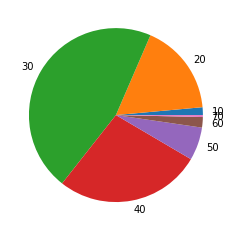

In [45]:
plt.pie(d['2020년'],labels=d['연령대'])

In [80]:
rate(category='완구키덜트게임')

,연령대,2019년,2020년,차이,증감률
0,10,21047.0,26273.0,5226.0,24.830142
1,20,253499.0,309763.0,56264.0,22.194959
2,30,715818.0,833018.0,117200.0,16.372877
3,40,381731.0,493110.0,111379.0,29.177353
4,50,82138.0,111723.0,29585.0,36.018652
5,60,25207.0,35363.0,10156.0,40.290396
6,70,4832.0,6521.0,1689.0,34.954470


In [33]:
완구키덜트게임 = rate_sex(category='완구키덜트게임')
완구키덜트게임.sort_values(by='증감률',ascending=False)

,연령대,성별,2019년,2020년,차이,증감률
10,60,F,12188.0,18884.0,6696.0,54.939285
8,50,F,42311.0,61211.0,18900.0,44.669235
13,70,M,2413.0,3398.0,985.0,40.820555
6,40,F,216486.0,291942.0,75456.0,34.854910
1,10,M,9404.0,12499.0,3095.0,32.911527
12,70,F,2419.0,3123.0,704.0,29.102935
9,50,M,39827.0,50512.0,10685.0,26.828533
11,60,M,13019.0,16479.0,3460.0,26.576542
2,20,F,159373.0,199892.0,40519.0,25.424005
7,40,M,165245.0,201168.0,35923.0,21.739236


In [47]:
완구키덜트게임[완구키덜트게임.성별=='M']['2020년'].sum()

646896.0

In [34]:
a=완구키덜트게임[완구키덜트게임.연령대.isin([50,60])]
c=a.groupby('성별').sum()
c['증감']=c['차이']/c['2019년']
c

,연령대,2019년,2020년,차이,증감률,증감
성별,,,,,,
F,110,54499.0,80095.0,25596.0,99.608519,0.469660
M,110,52846.0,66991.0,14145.0,53.405075,0.267665


In [35]:
완구키덜트게임[완구키덜트게임.성별=='M']['2020년'].sum()+주방수납잡화[주방수납잡화.성별=='M']['2020년'].sum()

NameError: ignored

In [ ]:
완구키덜트게임[완구키덜트게임.성별=='F']['2020년'].sum()+주방수납잡화[주방수납잡화.성별=='F']['2020년'].sum()

In [ ]:
rate(category='주방수납잡화')

In [ ]:
주방수납잡화 = rate_sex(category='주방수납잡화')
주방수납잡화

In [ ]:
rate(category='헬스기구용품')

In [ ]:
헬스기구용품 = rate_sex(category='헬스기구용품')
헬스기구용품

In [ ]:
청년층 = 헬스기구용품[헬스기구용품.연령대.isin([20,30])]
장년층 = 헬스기구용품[헬스기구용품.연령대.isin([40,50])]
청년층

In [ ]:
청년층[청년층.성별=='F']['2020년'].sum()

In [ ]:
장년층[장년층.성별=='M']['2020년'].sum()

In [ ]:
주방수납잡화['2020년'].sum()

In [ ]:
완구키덜트게임['2020년'].sum()

In [ ]:
(완구키덜트게임['2020년'].sum()-완구키덜트게임['2019년'].sum())/완구키덜트게임['2019년'].sum()

In [ ]:
mcorp_inc = pd.read_csv('/content/gdrive/Shared drives/청년취업아카데미_KDX한국데이터거래소/Data/mcorp_cate_inc.csv')
mcorp_inc

In [ ]:
round(mcorp_inc.소비건수_증감율[mcorp_inc.소비업종=='헬스기구용품'],1)